<a href="https://colab.research.google.com/github/jcmm518/Redes/blob/main/Copia_de_07MAIR_VC02_VC03_Introducci%C3%B3n_a_Deep_Learning_Colab_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NUESTRA PRIMERA RED NEURONAL: MNIST DATASET**

In [ ]:
#Importemos TensorFlow 2.X y Numpy
import numpy as np
import tensorflow as tf
tf.__version__

'2.4.1'

#### **- Cargando el conjunto de datos**

In [ ]:
# Importamos el dataset MNIST y cargamos los datos
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### **- Inspeccionando el conjunto de datos**

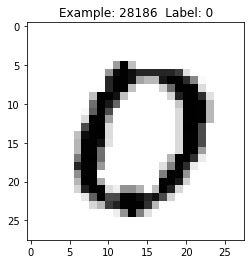

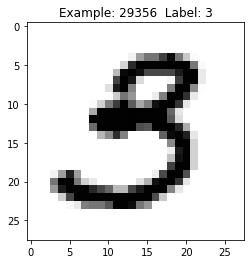

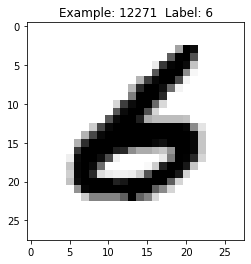

In [ ]:
import matplotlib.pyplot as plt
# Función auxiliar para visualizar datos de entrenamiento de manera aleatoria
def display_digit(num):
  # Seleccionar la imagen num de mnist.train.images y hacer un reshape al tamaño de la imagen
  image = x_train[num,:].reshape([28,28]) #(X)
  # Seleccionar el target num de mnist.train.labels (Recuerda que esta en one-hot encoding, conviertelo a decimal con argmax)
  label = y_train[num] #(X)
  # Mostrar
  plt.title('Example: %d  Label: %d' % (num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

# Mostramos algunos ejemplos
display_digit(np.random.randint(0, x_train.shape[0]))
display_digit(np.random.randint(0, x_train.shape[0]))
display_digit(np.random.randint(0, x_train.shape[0]))

#### **- Acondicionando el conjunto de datos**

In [ ]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_te = x_train / 255.0, x_test / 255.0 #Cambio al rango 0-1 -> Disminuyo CC (Costo Computacional)
y_train = to_categorical(y_train, num_classes=10) #One-hot encoding para minimizar error
print(y_train.shape)
y_te = to_categorical(y_test, num_classes=10)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
print(y_tr.shape)
# print(y_tr[0])

(60000, 10)
(54000, 10)


In [ ]:
print(y_tr[36])
print(y_tr[36].argmax(axis=0))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [ ]:
# Voy a necesitar importar una serie de modulos para programar mi red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Vamos a codificar la topología de nuestra primera red neuronal!!!
model = Sequential()
model.add(Flatten())
model.add(Dense(512, input_shape=(28*28,), activation="relu"))
model.add(Dense(10, activation="softmax")) #Capa salida -> Mismo número de neuronas que de clases objetivo

# Ahí tenemos nuestro primer MLP con una única capa oculta de 512 neuronas

In [ ]:
#Traigamos nuestro optimizador
from tensorflow.keras.optimizers import SGD
# Ahora que tengo definida la arquitectura, la compilo
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.005), metrics=["accuracy"])

In [ ]:
# Por fin podemos entrenar nuestra primera red neuronal
print("[INFO]: Entrenando red neuronal...")
H = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=50, batch_size=128)

[INFO]: Entrenando red neuronal...
Epoch 1/50
422/422 [==============================] - 3s 4ms/step - loss: 1.8609 - accuracy: 0.4880 - val_loss: 0.9855 - val_accuracy: 0.8145
Epoch 2/50
422/422 [==============================] - 1s 3ms/step - loss: 0.8695 - accuracy: 0.8263 - val_loss: 0.6558 - val_accuracy: 0.8552
Epoch 3/50
422/422 [==============================] - 1s 3ms/step - loss: 0.6178 - accuracy: 0.8601 - val_loss: 0.5332 - val_accuracy: 0.8722
Epoch 4/50
422/422 [==============================] - 1s 3ms/step - loss: 0.5158 - accuracy: 0.8736 - val_loss: 0.4692 - val_accuracy: 0.8828
Epoch 5/50
422/422 [==============================] - 1s 3ms/step - loss: 0.4626 - accuracy: 0.8815 - val_loss: 0.4295 - val_accuracy: 0.8908
Epoch 6/50
422/422 [==============================] - 1s 3ms/step - loss: 0.4219 - accuracy: 0.8898 - val_loss: 0.4016 - val_accuracy: 0.8940
Epoch 7/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3921 - accuracy: 0.8965 - val_loss: 0

#### **- Observando el proceso de entrenamiento para tomar decisiones**

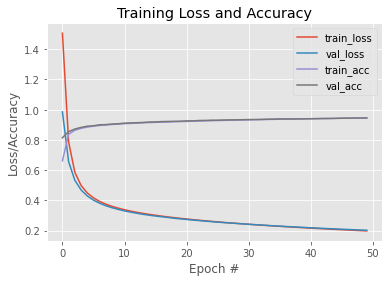

In [ ]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [ ]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_te, batch_size=128)
print(y_te[0])
print(predictions[0])
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

[INFO]: Evaluando red neuronal...
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[6.0238573e-05 6.7321571e-07 3.5478669e-04 2.5264076e-03 2.7598262e-06
 8.4581137e-05 5.0927284e-08 9.9642700e-01 2.3355526e-05 5.2015111e-04]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.93      0.94      0.93      1010
           4       0.94      0.95      0.94       982
           5       0.94      0.91      0.93       892
           6       0.95      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.93      0.92      0.93       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


--------------------------------------------------------------------------

## **MLP APLICADO A TEXTO: EJEMPLO REUTERS**

#### **- Cargando el conjunto de datos**

In [ ]:
import numpy as np
import tensorflow as tf
# Importamos el dataset REUTERS y cargamos los datos
reuters = tf.keras.datasets.reuters
WORD_LIMIT = 10000
(training_data, training_labels), (testing_data, testing_labels) = reuters.load_data(num_words=WORD_LIMIT)
print(training_data.shape)
print(training_labels.shape)
print(testing_data.shape)
print(testing_labels.shape)

2113536/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
(2246,)
(2246,)


#### **- Inspeccionando el conjunto de datos**

In [ ]:
# Los datos son numericos para decodificarlos, se puede usar reuters.get_word_index()
word_index = reuters.get_word_index()
reverse_word_index = dict({value : key for key, value in word_index.items()})
decoded = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in training_data[77]]
)
decoded

'? the european commission confirmed it authorised the export of 60 500 tonnes of current series white sugar at a maximum rebate of 43 147 european currency units ecus per 100 kilos out of this traders in the u k received 43 500 tonnes in the netherlands 12 000 in denmark 4 000 and in west germany 1 000 tonnes reuter 3'

#### **- Acondicionando el conjunto de datos**

In [ ]:
# Función auxiliar para representar las palabras (que no entiende nuestra red neuronal) en números 
import numpy as np
# one hot encoding del input, vector con cada indice indicando si una palabra esta presente
def one_hot_encode(data):
    encoded = np.zeros((len(data),WORD_LIMIT))
    for i, v in enumerate(data):
        encoded[i,v] = 1 # localiza las columnas del genero correspondiente, marca con 1
    return encoded

In [ ]:
# Convertimos nuestras palabras a números
x_train = one_hot_encode(training_data)
x_test = one_hot_encode(testing_data)
print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


In [ ]:
print(x_test[3])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
# Convertimos nuestros labels (categoría reseña) a one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(training_labels)
y_test = to_categorical(testing_labels)
print(y_train.shape)
print(y_test.shape)

(8982, 46)
(2246, 46)


In [ ]:
print(y_test[3])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Vamos a codificar la topología de nuestro MLP
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(WORD_LIMIT,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [ ]:
# Ahora que tengo definida la arquitectura, la compilo
model.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [ ]:
# A entrenar nuestra red neuronal sea dicho!
H = model.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 1s 4ms/step - loss: 1.4489 - accuracy: 0.6799 - val_loss: 0.9870 - val_accuracy: 0.7824
Epoch 2/20
225/225 [==============================] - 1s 3ms/step - loss: 0.5423 - accuracy: 0.8818 - val_loss: 0.8898 - val_accuracy: 0.8091
Epoch 3/20
225/225 [==============================] - 1s 3ms/step - loss: 0.2685 - accuracy: 0.9415 - val_loss: 0.8949 - val_accuracy: 0.8080
Epoch 4/20
225/225 [==============================] - 1s 3ms/step - loss: 0.1928 - accuracy: 0.9552 - val_loss: 0.9110 - val_accuracy: 0.8058
Epoch 5/20
225/225 [==============================] - 1s 3ms/step - loss: 0.1656 - accuracy: 0.9559 - val_loss: 0.9455 - val_accuracy: 0.7986
Epoch 6/20
225/225 [==============================] - 1s 3ms/step - loss: 0.1409 - accuracy: 0.9595 - val_loss: 0.9633 - val_accuracy: 0.8002
Epoch 7/20
225/225 [==============================] - 1s 3ms/step - loss: 0.1288 - accuracy: 0.9599 - val_loss: 0.9955 - val_accuracy: 0.8063
Epoch 

#### **- Observando el proceso de entrenamiento para tomar decisiones**

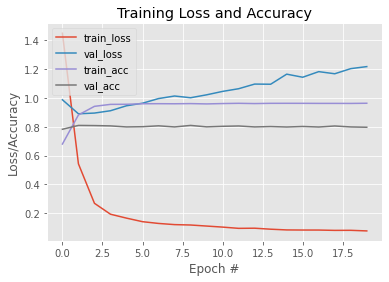

In [ ]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model.predict(x_test)
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 2ms/step - loss: 1.3067 - accuracy: 0.7894
Loss 1.3066856861114502, accuracy 0.7894033789634705


## **REGULARIZACIÓN EN APRENDIZAJE PROFUNDO**

#### **- Weight regularization L1/L2**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
# Vamos a codificar la topología de nuestro MLP
model_reg = Sequential()
model_reg.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(WORD_LIMIT,)))
model_reg.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_reg.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [ ]:
# Ahora que tengo definida la arquitectura, la compilo
model_reg.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [ ]:
# A entrenar nuestra red neuronal sea dicho!
H = model_reg.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 1s 4ms/step - loss: 2.3797 - accuracy: 0.6526 - val_loss: 1.8195 - val_accuracy: 0.7034
Epoch 2/20
225/225 [==============================] - 1s 3ms/step - loss: 1.6968 - accuracy: 0.7335 - val_loss: 1.7036 - val_accuracy: 0.7284
Epoch 3/20
225/225 [==============================] - 1s 3ms/step - loss: 1.5981 - accuracy: 0.7542 - val_loss: 1.6592 - val_accuracy: 0.7273
Epoch 4/20
225/225 [==============================] - 1s 3ms/step - loss: 1.5508 - accuracy: 0.7602 - val_loss: 1.6300 - val_accuracy: 0.7474
Epoch 5/20
225/225 [==============================] - 1s 3ms/step - loss: 1.5123 - accuracy: 0.7740 - val_loss: 1.6277 - val_accuracy: 0.7529
Epoch 6/20
225/225 [==============================] - 1s 3ms/step - loss: 1.4705 - accuracy: 0.7794 - val_loss: 1.5938 - val_accuracy: 0.7652
Epoch 7/20
225/225 [==============================] - 1s 3ms/step - loss: 1.4405 - accuracy: 0.7879 - val_loss: 1.5357 - val_accuracy: 0.7641
Epoch 

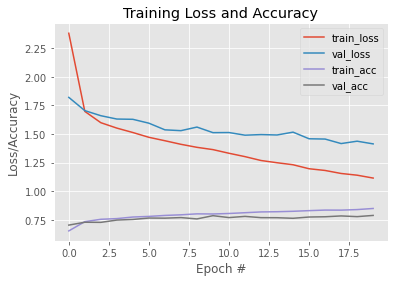

In [ ]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model.predict(x_test)
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 2ms/step - loss: 1.3067 - accuracy: 0.7894
Loss 1.3066856861114502, accuracy 0.7894033789634705


#### **- Dropout**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Vamos a codificar la topología de nuestro MLP
model_drop = Sequential()
model_drop.add(Dense(128,activation='relu', input_shape=(WORD_LIMIT,)))
#model_drop.add(Dropout(0.5))
model_drop.add(Dropout(0.75))
model_drop.add(Dense(64,activation='relu'))
#model_drop.add(Dropout(0.5))
model_drop.add(Dropout(0.75))
model_drop.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [ ]:
# Ahora que tengo definida la arquitectura, la compilo
model_drop.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [ ]:
# A entrenar nuestra red neuronal sea dicho!
H = model_drop.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 1s 4ms/step - loss: 2.4942 - accuracy: 0.3884 - val_loss: 1.6770 - val_accuracy: 0.6088
Epoch 2/20
225/225 [==============================] - 1s 3ms/step - loss: 1.8544 - accuracy: 0.5336 - val_loss: 1.4986 - val_accuracy: 0.6772
Epoch 3/20
225/225 [==============================] - 1s 3ms/step - loss: 1.6942 - accuracy: 0.5872 - val_loss: 1.4117 - val_accuracy: 0.6984
Epoch 4/20
225/225 [==============================] - 1s 3ms/step - loss: 1.5601 - accuracy: 0.6248 - val_loss: 1.3299 - val_accuracy: 0.7067
Epoch 5/20
225/225 [==============================] - 1s 3ms/step - loss: 1.4658 - accuracy: 0.6398 - val_loss: 1.2838 - val_accuracy: 0.7145
Epoch 6/20
225/225 [==============================] - 1s 3ms/step - loss: 1.4200 - accuracy: 0.6512 - val_loss: 1.2640 - val_accuracy: 0.7129
Epoch 7/20
225/225 [==============================] - 1s 3ms/step - loss: 1.3695 - accuracy: 0.6600 - val_loss: 1.2643 - val_accuracy: 0.7140
Epoch 

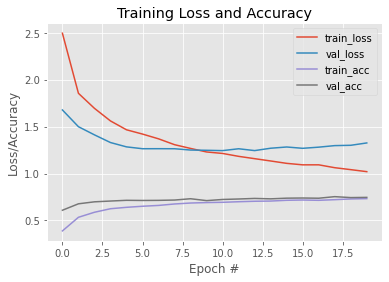

In [ ]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# ¿Y si desconectamos mayor porcentaje de neuronas?

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model.predict(x_test)
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 2ms/step - loss: 1.3067 - accuracy: 0.7894
Loss 1.3066856861114502, accuracy 0.7894033789634705


#### **- Batch Normalization**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
# Vamos a codificar la topología de nuestro MLP
model_bn = Sequential()
model_bn.add(Dense(128,activation='relu', input_shape=(WORD_LIMIT,)))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.75))
model_bn.add(Dense(64,activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.75))
model_bn.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [ ]:
# Ahora que tengo definida la arquitectura, la compilo
model_bn.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [ ]:
# A entrenar nuestra red neuronal sea dicho!
H = model_bn.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 1s 5ms/step - loss: 3.4875 - accuracy: 0.3073 - val_loss: 1.9786 - val_accuracy: 0.6010
Epoch 2/20
225/225 [==============================] - 1s 4ms/step - loss: 2.1030 - accuracy: 0.5591 - val_loss: 1.4550 - val_accuracy: 0.6861
Epoch 3/20
225/225 [==============================] - 1s 4ms/step - loss: 1.8282 - accuracy: 0.6031 - val_loss: 1.3497 - val_accuracy: 0.7062
Epoch 4/20
225/225 [==============================] - 1s 4ms/step - loss: 1.6146 - accuracy: 0.6359 - val_loss: 1.2759 - val_accuracy: 0.7112
Epoch 5/20
225/225 [==============================] - 1s 4ms/step - loss: 1.5228 - accuracy: 0.6561 - val_loss: 1.2286 - val_accuracy: 0.7123
Epoch 6/20
225/225 [==============================] - 1s 4ms/step - loss: 1.4212 - accuracy: 0.6754 - val_loss: 1.1993 - val_accuracy: 0.7234
Epoch 7/20
225/225 [==============================] - 1s 4ms/step - loss: 1.3764 - accuracy: 0.6825 - val_loss: 1.1554 - val_accuracy: 0.7401
Epoch 

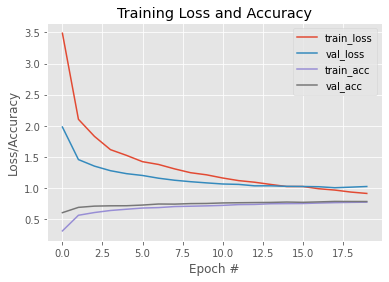

In [ ]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model.predict(x_test)
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 2ms/step - loss: 1.3067 - accuracy: 0.7894
Loss 1.3066856861114502, accuracy 0.7894033789634705
